# Final Project  Predicting House Prices
## Gustavo Ramos
## CS 577 

## Data importing & Preprocessing

In [1]:
#import some libraries needed to for data importing and preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import norm, skew, probplot
from scipy.special import boxcox1p
import warnings
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

In [2]:
# reading train and test files all .csv 

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
#getting dimensions sizes of train.csv
train.shape

(1460, 81)

In [4]:
#find data types of all series/columns
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# get a more visible look at dat inside out dataframe
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
# determine the percentage of missing values for each feature and disply in a seperate table called missing_data
total = train.isnull().sum().sort_values(ascending = False)
percent = (train.isnull().sum() / train.isnull().count()*100).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])

missing_data.head(25)

,Total,Percent
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageCond,81,5.547945
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945


Text(0.5, 1.0, 'Top Variables W/ Missing Data')

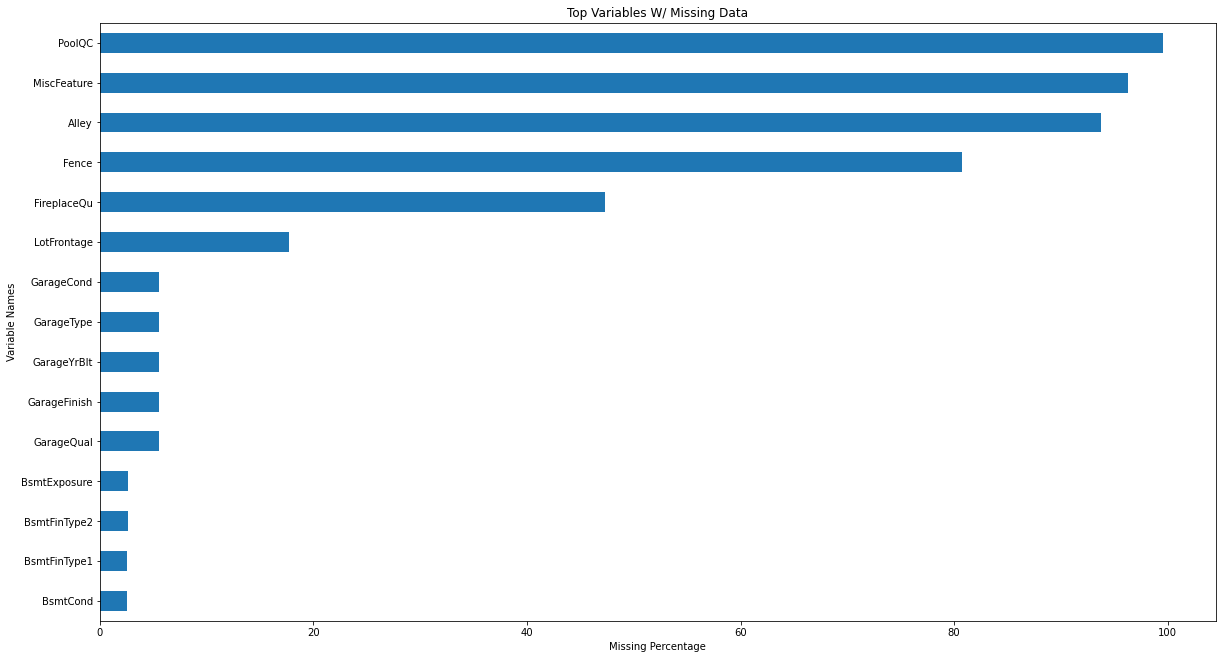

In [7]:
#ouput visualisation of the missing data based on percentage high percent means more missing data. linear realtionship
missing_data['Percent'].head(15).plot(kind = 'barh', figsize = (20,11)).invert_yaxis()
plt.xlabel("Missing Percentage")
plt.ylabel("Variable Names")
plt.title("Top Variables W/ Missing Data")

In [8]:
# checking the types of values for most missing data
train[['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage','GarageCond', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual']]

,PoolQC,MiscFeature,Alley,Fence,FireplaceQu,LotFrontage,GarageCond,GarageType,GarageYrBlt,GarageFinish,GarageQual,BsmtExposure,BsmtFinType2,BsmtFinType1,BsmtCond,BsmtQual
0,NaN,NaN,NaN,NaN,NaN,65.0,TA,Attchd,2003.0,RFn,TA,No,Unf,GLQ,TA,Gd
1,NaN,NaN,NaN,NaN,TA,80.0,TA,Attchd,1976.0,RFn,TA,Gd,Unf,ALQ,TA,Gd
2,NaN,NaN,NaN,NaN,TA,68.0,TA,Attchd,2001.0,RFn,TA,Mn,Unf,GLQ,TA,Gd
3,NaN,NaN,NaN,NaN,Gd,60.0,TA,Detchd,1998.0,Unf,TA,No,Unf,ALQ,Gd,TA
4,NaN,NaN,NaN,NaN,TA,84.0,TA,Attchd,2000.0,RFn,TA,Av,Unf,GLQ,TA,Gd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,NaN,NaN,NaN,NaN,TA,62.0,TA,Attchd,1999.0,RFn,TA,No,Unf,Unf,TA,Gd
1456,NaN,NaN,NaN,MnPrv,TA,85.0,TA,Attchd,1978.0,Unf,TA,No,Rec,ALQ,TA,Gd
1457,NaN,Shed,NaN,GdPrv,Gd,66.0,TA,Attchd,1941.0,RFn,TA,No,Unf,GLQ,Gd,TA
1458,NaN,NaN,NaN,NaN,NaN,68.0,TA,Attchd,1950.0,Unf,TA,Mn,Rec,GLQ,TA,TA


In [9]:
#input 'none' into categorical data that have missing values
cat = ['PoolQC', 'MiscFeature', 
       'Alley', 'Fence', 'FireplaceQu', 
       'GarageCond', 'GarageType', 
       'GarageFinish', 'GarageQual', 
       'BsmtExposure', 'BsmtFinType2', 
       'BsmtFinType1', 'BsmtCond', 'BsmtQual', 
       'MSSubClass', 'MasVnrType']

for col in cat:
    train[col] = train[col].fillna('None')

In [10]:
#Lot Frontage is Important so we will fill in empty values with median since it will be more robust to outliers

train['LotFrontage'] = train.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [11]:
#fill in last bit of data that is empty 
train['Electrical'] = train['Electrical'].fillna(train['Electrical'].mode()[0])
train['GarageYrBlt'] = train['GarageYrBlt'].fillna(0)
train['MasVnrArea'] = train['MasVnrArea'].fillna(0)
train = train.drop(['Utilities'], axis = 1)

In [12]:
#check to see there is no missing data anymore
train.isnull().sum().max()

0

## Data Analysis And Visualization

In [13]:
# identify the number of categorical features and numeric aswell
categorical = train.select_dtypes(include = 'object').columns.to_list()
#print(categorical)
print(f'Number of categorical features is: {len(categorical)}')

quantitative = train.select_dtypes(exclude = 'object').columns.to_list()
quantitative.remove('Id')
quantitative.remove('SalePrice')
#print(quantitative)
print(f'Number of Quantitative features is: {len(quantitative)}')

Number of categorical features is: 42
Number of Quantitative features is: 36


In [14]:
#get a statistical summary of data set
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1460.0,70.199658,22.431902,21.0,60.00,70.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1460.0,103.117123,180.731373,0.0,0.00,0.0,164.25,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


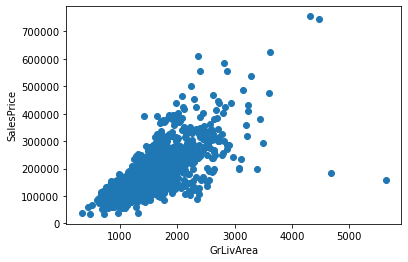

In [15]:
# we want to see if we can create a pivot for GrLivArea and get rid of any outliers
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.xlabel('GrLivArea')
plt.ylabel('SalesPrice')
plt.show()

Now we will delete any outliers in plot and check our plot again

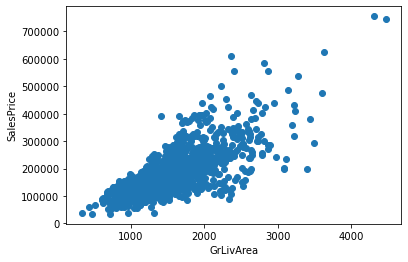

In [16]:
train = train.drop(train[ (train['GrLivArea'] > 4000) & (train['SalePrice'] < 300000) ].index)

fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'],train['SalePrice'])
plt.xlabel('GrLivArea')
plt.ylabel('SalesPrice')
plt.show()

mu = 180932.91906721535, sigma = 79467.78892987774
Skewness: 1.8812964895244009
Kurtosis: 6.523066888485879


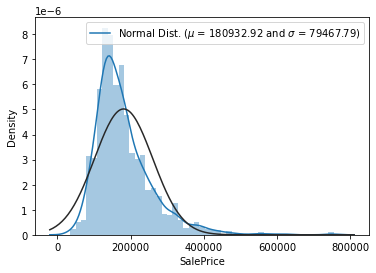

In [17]:
# see distribution of Sale price values
import scipy.stats as stat

y = train['SalePrice']
#sns.set(rc={'figure.figsize':(8,5)})
sns.distplot(y, fit=norm)

mu, sigma = norm.fit(train['SalePrice'])
print(f'mu = {mu}, sigma = {sigma}')
print(f"Skewness: {y.skew()}")
print(f"Kurtosis: {y.kurt()}")
plt.legend(['Normal Dist. ($\mu$ = {:.2f} and $\sigma$ = {:.2f})'.format(mu,sigma)])

mu = 12.024015155682552, sigma = 0.3995757283645756
Skewness: 0.12157976050304882
Kurtosis: 0.8047507917418972


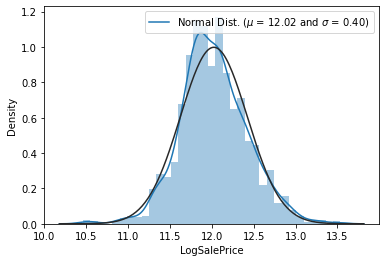

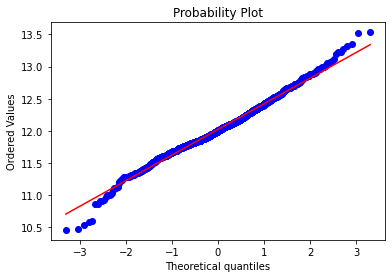

In [18]:
# transform log(x) to normalie Sale Price
train['LogSalePrice'] = np.log1p(train['SalePrice'])

sns.distplot(train['LogSalePrice'], fit = norm)

mu, sigma = norm.fit(train['LogSalePrice'])
print(f'mu = {mu}, sigma = {sigma}')
print(f"Skewness: {train['LogSalePrice'].skew()}")
print(f"Kurtosis: {train['LogSalePrice'].kurt()}")
plt.legend(['Normal Dist. ($\mu$ = {:.2f} and $\sigma$ = {:.2f})'.format(mu,sigma)])

fig = plt.figure()
res = probplot(train['LogSalePrice'], plot = plt)
plt.show()

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
print(quantitative)
print(categorical)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDri

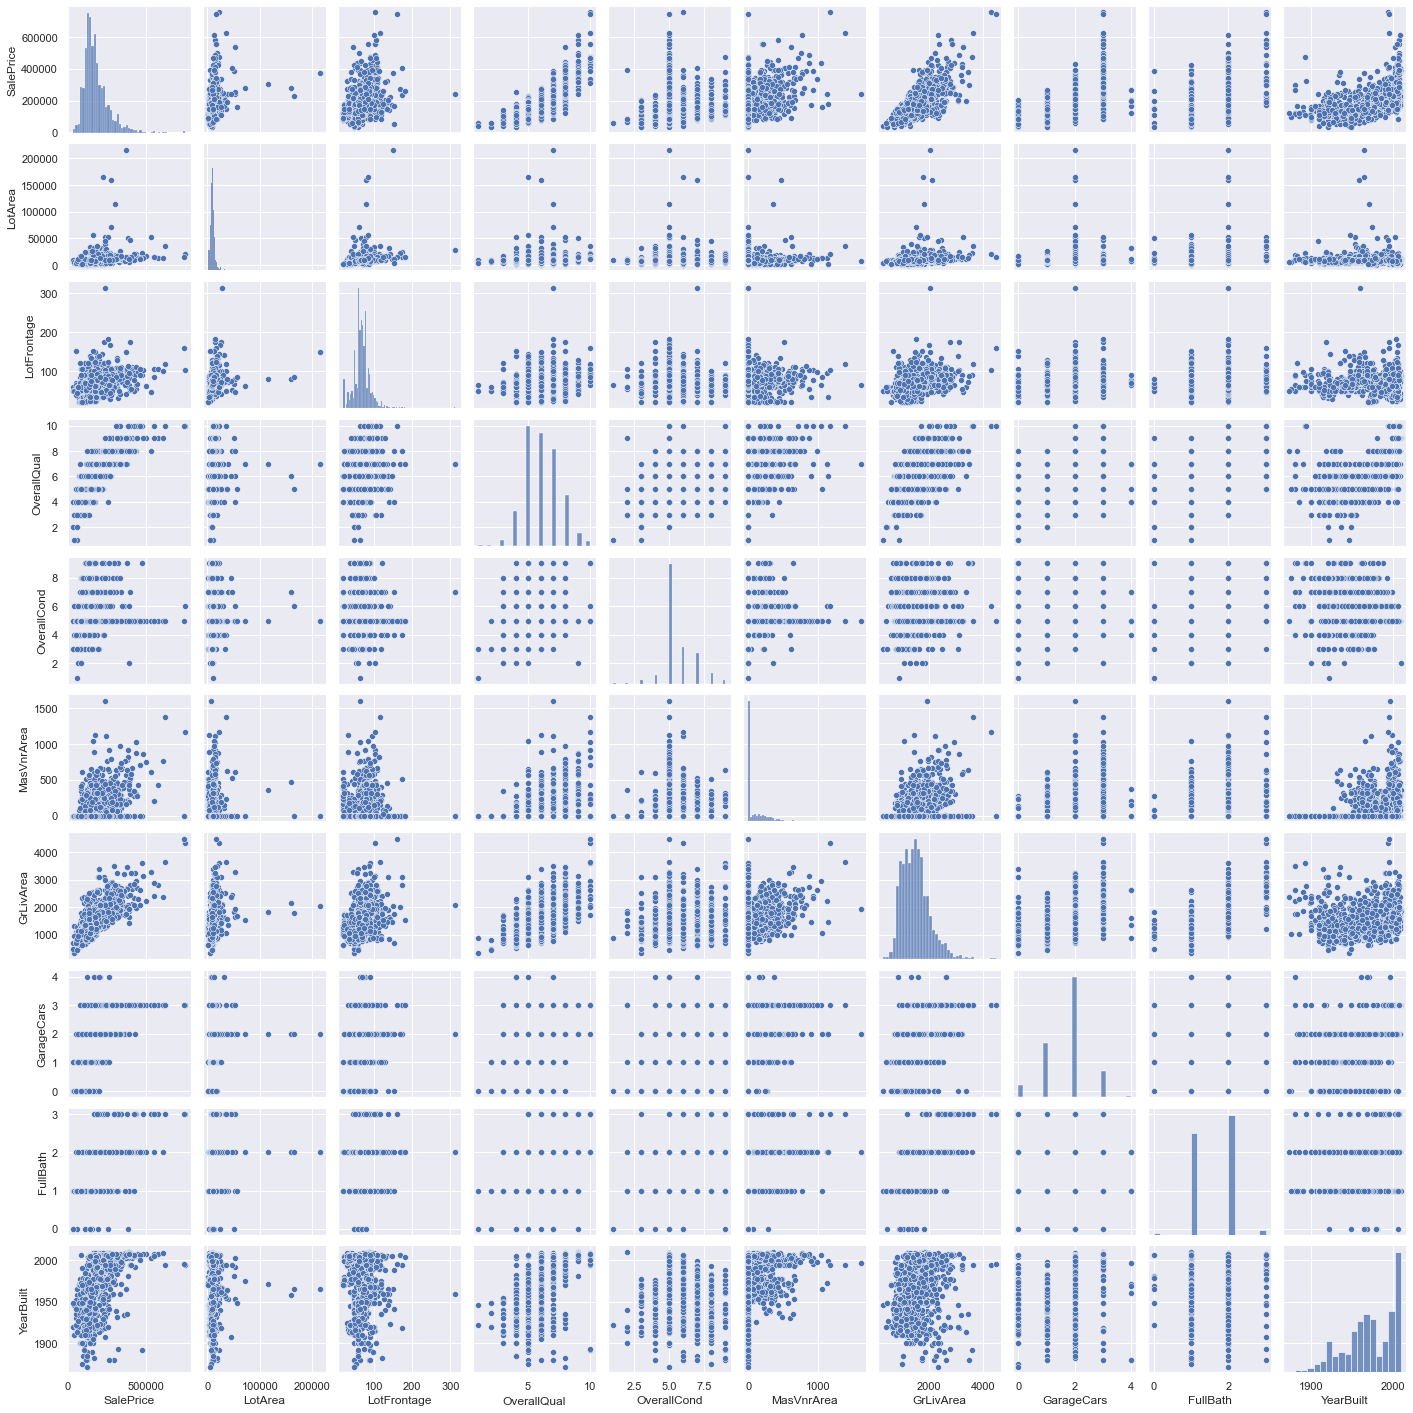

In [21]:
#further inspect distributions of some numeric values to see if any might need transforming
sns.set()
cols = ['SalePrice', 'LotArea', 'LotFrontage', 'OverallQual', 'OverallCond', 'MasVnrArea', 'GrLivArea', 'GarageCars'
       , 'FullBath', 'YearBuilt']
sns.pairplot(train[cols], size = 2.0)
plt.show()

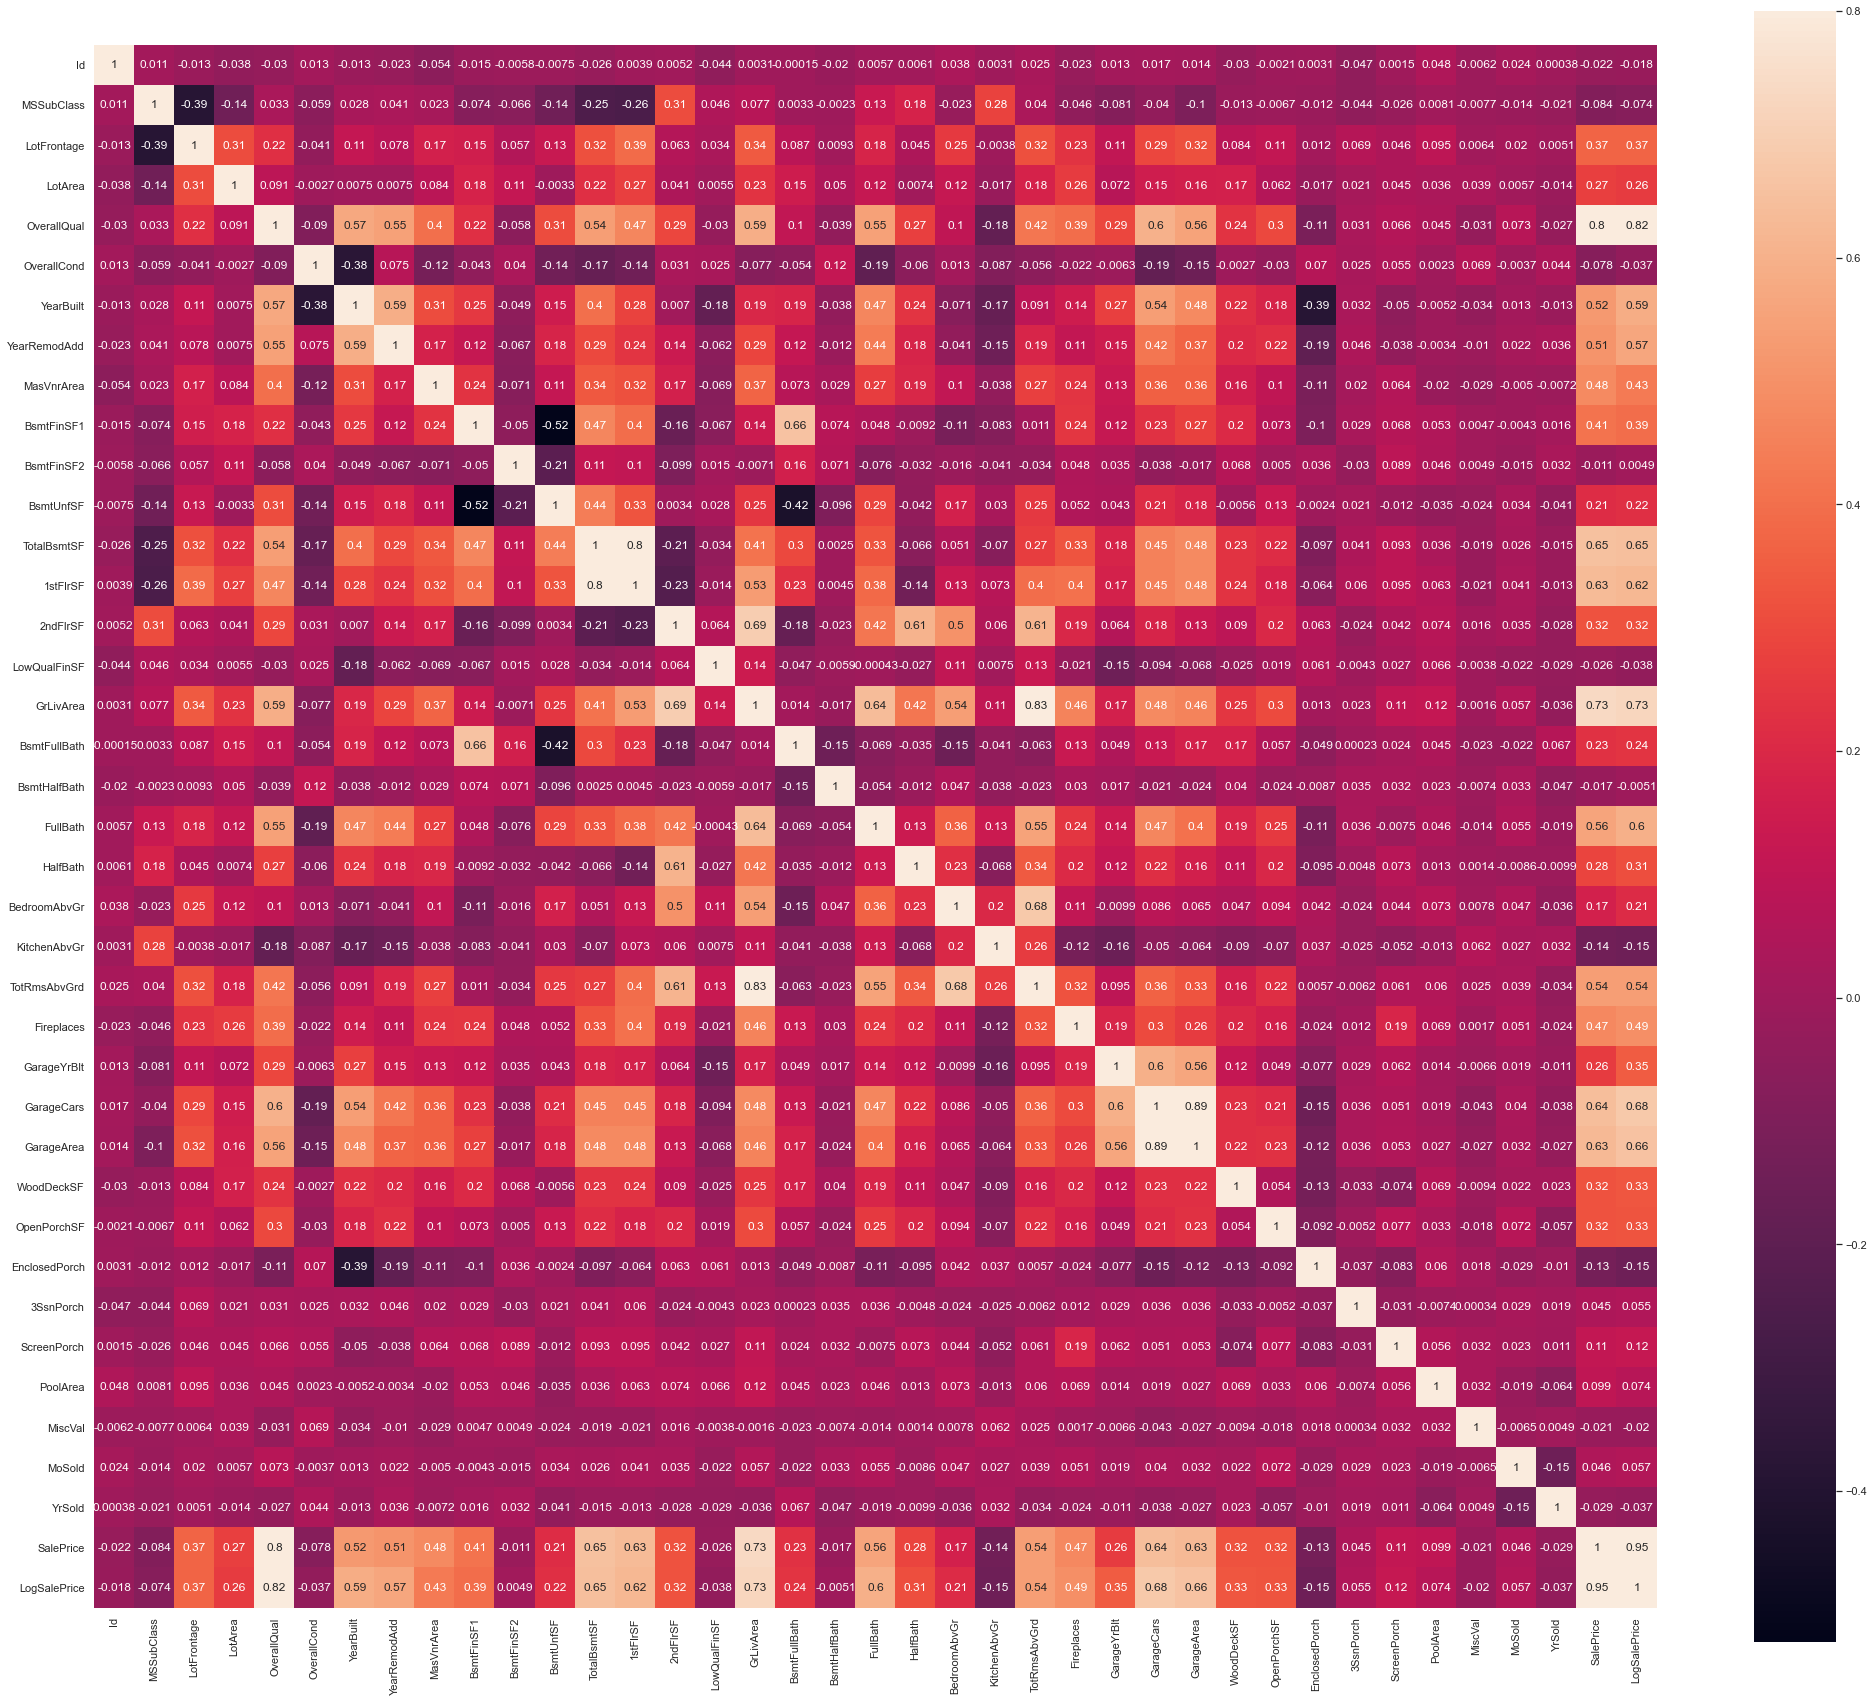

In [22]:
# create a heatmap to find any correlations that might affect our a data set
sns.set(rc={'figure.figsize':(35,30)})
sns.heatmap(train.corr(), vmax = .8, annot = True, square = True)
plt.show()

In [23]:
#make certain numeric features into categorical features by applying strings
train['OverallCond'] = train['OverallCond'].apply(str)
train['MoSold'] = train['MoSold'].apply(str)
train['YrSold'] = train['YrSold'].apply(str)
train['MSSubClass'] = train['MSSubClass'].apply(str)

train['TotalSF'] = train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF']

In [24]:
train[categorical]

,MSZoning,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,None,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,None,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
1,RL,Pave,None,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
2,RL,Pave,None,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
3,RL,Pave,None,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,None,None,None,WD,Abnorml
4,RL,Pave,None,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,None,Reg,Lvl,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
1456,RL,Pave,None,Reg,Lvl,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,GasA,TA,Y,SBrkr,TA,Min1,TA,Attchd,Unf,TA,TA,Y,None,MnPrv,None,WD,Normal
1457,RL,Pave,None,Reg,Lvl,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,None,Ex,Gd,Stone,TA,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,None,GdPrv,Shed,WD,Normal
1458,RL,Pave,None,Reg,Lvl,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,TA,TA,Mn,GLQ,Rec,GasA,Gd,Y,FuseA,Gd,Typ,None,Attchd,Unf,TA,TA,Y,None,None,None,WD,Normal


In [25]:
train[quantitative]

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999.0,2,460,0,40,0,0,0,0,0,8,2007
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1978.0,2,500,349,0,0,0,0,0,0,2,2010
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1941.0,1,252,0,60,0,0,0,0,2500,5,2010
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1950.0,1,240,366,0,112,0,0,0,0,4,2010


In [26]:
#take categorical features and label encode them
cat = ('MSSubClass', 'OverallQual', 'OverallCond', 'LotShape', 'LandSlope', 'ExterQual', 'ExterCond', 'BsmtQual'
      , 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC'
      , 'Fence', 'PavedDrive', 'BsmtFinType1', 'BsmtFinType2', 'BsmtExposure', 'Foundation', 'Street', 'Alley'
      , 'MoSold', 'YrSold', 'Neighborhood')

for i in cat:
    lbl = LabelEncoder()
    lbl.fit(list(train[i].values))
    train[i] = lbl.transform(list(train[i].values))
    
train.shape

(1458, 82)

In [27]:
#find out number of skewed features
quant = train.dtypes[train.dtypes != 'object'].index
skewed = train[quant].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skews = pd.DataFrame({'skews': skewed})
skews.head()
skews.shape

(61, 1)

In [28]:
#normalize number of skewed features
skews = skews[abs(skews) > 0.75]
skewfeat = skews.index
for i in skewfeat:
    train[i] = boxcox1p(train[i],.15)

In [30]:
#one-hot encode our train data set
train = pd.get_dummies(train)
train.head()

,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,Neighborhood,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SalePrice,LogSalePrice,TotalSF,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_Fin,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.730463,2.750250,5.831328,19.212182,0.730463,0.730463,1.540963,0.0,2.055642,2.259674,1.820334,14.187527,14.187527,8.059126,1.194318,1.820334,1.194318,1.194318,1.820334,1.540963,1.194318,11.170327,2.259674,0.0,7.483296,11.692623,0.000000,11.692623,11.686189,0.0,13.698888,0.730463,0.000000,1.194318,0.730463,1.540963,0.730463,1.194318,2.602594,0.000000,1.540963,14.187527,1.194318,10.506271,2.055642,2.055642,1.194318,0.000000,5.714669,0.000000,0.0,0.0,0.0,1.540963,1.820334,0.0,1.820334,1.194318,35.190995,3.156009,14.976591,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,1.194318,1.820334,6.221214,19.712205,0.730463,0.730463,1.540963,0.0,4.137711,2.055642,2.440268,14.145138,14.145138,0.00

## Data Analytics

In [31]:
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [32]:
train_set = train[train.columns.difference(['Id','SalePrice','LogSalePrice'])]

In [33]:
# cross validation with N folds
Folds = 5

def cross_validate_rmse(model, nfolds):
    kfolds = KFold(n_splits = nfolds)
    rmse = np.sqrt(-cross_val_score(model,train_set,train.LogSalePrice,scoring='neg_mean_squared_error',cv = kfolds))
    
    return rmse


In [34]:
# make models for algortihms intended to use
lin_int = LinearRegression()
lin_noint = LinearRegression(fit_intercept = False)

forest = RandomForestRegressor(n_estimators = 100)

dtree = DecisionTreeRegressor(max_depth = 10)

mod_xgb = xgb.XGBRegressor(max_depth = 10, n_estimators = 1000, learning_rate = 0.1)

mod_lgb = lgb.LGBMRegressor(max_depth = 10, n_estimators = 1000, learning_rate = 0.1)

In [35]:
linearScoreInt = cross_validate_rmse(lin_int,Folds)
print(f'LinearRegression with Int score: {linearScoreInt.mean()} std:{linearScoreInt.std()}')

LinearRegression with Int score: 30883172.053699575 std:27471317.17392545


In [36]:
#use cross validation 5-folds and apply our algorithm models to find L2 Loss for each model
linearScoreNoInt = cross_validate_rmse(lin_noint,Folds)
print(f'LinearRegression w/no Int score: {linearScoreNoInt.mean()} std:{linearScoreNoInt.std()}')

dtreeScore = cross_validate_rmse(dtree,Folds)
print(f'DecisionTree Regressor score: {dtreeScore.mean()} std:{dtreeScore.std()}')

xgbScore = cross_validate_rmse(mod_xgb,Folds)
print(f'HistGradientBoost score: {xgbScore.mean()} std:{xgbScore.std()}')

lgbScore = cross_validate_rmse(mod_lgb,Folds)
print(f'LGBM Regressor with Int score: {lgbScore.mean()} std:{lgbScore.std()}')

LinearRegression w/no Int score: 0.014569820308533984 std:0.0008871699507892444
DecisionTree Regressor score: 0.02328250730669926 std:0.0013689950732614687
HistGradientBoost score: 0.014606495351696915 std:0.0007243266410200958
LGBM Regressor with Int score: 0.01504691997624756 std:0.0005257943133828717


In [37]:
plots = {'linear Regression':[linearScoreNoInt.mean(),linearScoreNoInt.std()], 'Dec. Tree':[dtreeScore.mean(),dtreeScore.std()],
        'XGBoost':[xgbScore.mean(),xgbScore.std()], 'LGBM':[lgbScore.mean(),lgbScore.std()]}
Alg_df = pd.DataFrame(data = plots).T.reset_index().sort_values(by = [0],ascending = True)
Alg_df.columns = ['Algorithm','RMSE','STD']

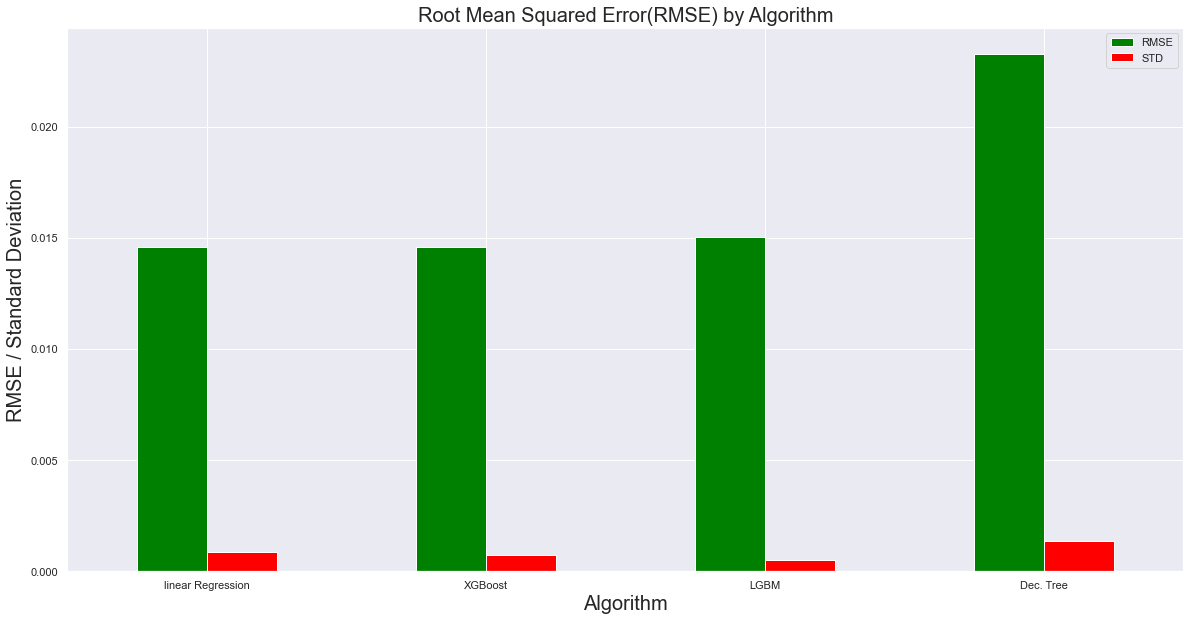

In [38]:
# create bar plot for algorithms L2 Loss
Alg_df.plot(kind='bar',x = 'Algorithm', y = ['RMSE', 'STD'], color = ['green','red'], figsize = (20,10), rot=0)
plt.xlabel("Algorithm",fontsize=20)
plt.ylabel("RMSE / Standard Deviation",fontsize=20)
plt.title("Root Mean Squared Error(RMSE) by Algorithm",fontsize=20)
plt.show()

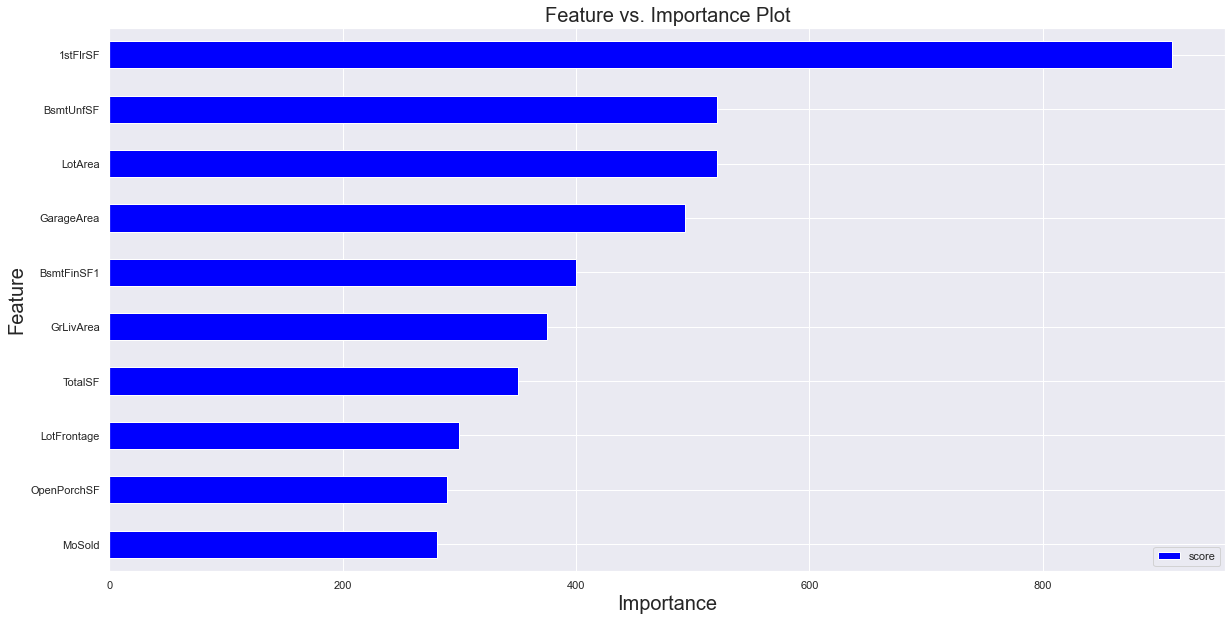

In [39]:
# use a tree based model to apply variable importance plot
model = mod_xgb.fit(train_set, train.LogSalePrice) #fit model on entire dataset to get variable importance since we fit it on each fold
feature_important = model.get_booster().get_score(importance_type='weight')

keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data[:10].plot(kind='barh', color = 'blue', figsize = (20,10)).invert_yaxis(); ## plot top 20 features
plt.xlabel("Importance",fontsize=20)
plt.ylabel("Feature",fontsize=20)
plt.title("Feature vs. Importance Plot",fontsize=20)
plt.show()